<a href="https://colab.research.google.com/github/laurash96/EDA-vehicle-traffic-data-Medellin/blob/main/EDA_Speed_and_time_of_travel_dataset_Medellin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Import libraries

In [1]:
import io
import pandas as pd
import numpy as np
import seaborn as sns
import calendar
import datetime
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

from google.colab import drive

import statsmodels.api as sm
from scipy import stats
from scipy.stats import pearsonr
from pylab import rcParams

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

#### Import data

Source: https://medata.gov.co/dataset/1-023-25-000287
Open data webpage from the city of Medellin, Colombia

JSON data dict: https://medata.gov.co/sites/default/files/distribution/1-023-25-000287/Velocidad_tiempo_viaje_GT.json

In [2]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
df_vel_tv = pd.read_csv("drive/MyDrive/Velocidad_tiempo_viaje/velocidad_y_tiempo_de_viaje_gt_sin_autopistas.csv", delimiter=";",  index_col = "FECHA_HORA",low_memory=False,parse_dates=True)

In [4]:
df_vel_tv.head()

,ID,TV_[S],CORREDOR,DIA,MES,YEAR,HORA,FECHA,NOMBRE_CORREDOR,Flujo_tipo,SENTIDO,INICIO,FIN,LONGITUD_KM,TV_MINUTOS,VELOCIDAD_KM/H,TV_MIN/KM,DIASEM,NOMBRE_DÍA
FECHA_HORA,,,,,,,,,,,,,,,,,,,
2017-01-02 06:00:00,1215,693,7,1,2,2017,6,1/02/2017,Avenida 80,Interrumpido,NS,Calle 65,Calle 30,5.1,11.6,26.0,2.3,3,Miercoles
2017-01-02 06:00:00,1217,641,9,1,2,2017,6,1/02/2017,Avenida 80,Interrumpido,SN,Calle 30,Calle 65,5.1,10.7,29.0,2.1,3,Miercoles
2017-01-02 06:00:00,1221,522,13,1,2,2017,6,1/02/2017,Avenida El Poblado,Interrumpido,NS,Calle 30,Calle 12Sur,3.8,8.7,26.0,2.3,3,Miercoles
2017-01-02 06:00:00,1222,453,14,1,2,2017,6,1/02/2017,Avenida El Poblado,Interrumpido,SN,Calle 12Sur,Calle 30,3.8,7.6,30.0,2.0,3,Miercoles
2017-01-02 06:00:00,1223,389,15,1,2,2017,6,1/02/2017,Avenida Guayabal,Interrumpido,NS,Calle 30,Calle 12Sur,4.1,6.5,38.0,1.6,3,Miercoles


##### Dataset info

In [5]:
df_vel_tv.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252618 entries, 2017-01-02 06:00:00 to 2020-12-15 20:00:00
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               252618 non-null  object 
 1   TV_[S]           252618 non-null  int64  
 2   CORREDOR         252618 non-null  int64  
 3   DIA              252618 non-null  int64  
 4   MES              252618 non-null  int64  
 5   YEAR             252618 non-null  int64  
 6   HORA             252618 non-null  int64  
 7   FECHA            252618 non-null  object 
 8   NOMBRE_CORREDOR  252618 non-null  object 
 9   Flujo_tipo       252618 non-null  object 
 10  SENTIDO          252618 non-null  object 
 11  INICIO           252618 non-null  object 
 12  FIN              252618 non-null  object 
 13  LONGITUD_KM      252618 non-null  float64
 14  TV_MINUTOS       252618 non-null  float64
 15  VELOCIDAD_KM/H   252618 non-null  float64
 16  TV_M

#### Data processing

##### Column names replacing

In [6]:
column_name_mapping = {
    'TV_[S]': 'T_TIME[S]',
    'CORREDOR': 'ROAD_CORRIDOR',
    'DIA': 'DAY',
    'MES': 'MONTH',
    'HORA': 'HOUR',
    'FECHA': 'DATE',
    'NOMBRE_CORREDOR': 'CORRIDOR_NAME',
    'Flujo_tipo': 'FLOW_TYPE',
    'SENTIDO': 'DIRECTION',
    'INICIO': 'START',
    'FIN': 'ND',
    'LONGITUD_KM': 'LENGTH_KM',
    'TV_MINUTOS': 'TT_MINUTES',
    'VELOCIDAD_KM/H': 'SPEED_KM/H',
    'TV_MIN/KM': 'TT_MIN/KM',
    'DIASEM': 'DAY_OF_WEEK',
    'NOMBRE_DÍA': 'DAY_NAME'
}

In [7]:
df_vel_tv.rename(columns=column_name_mapping, inplace=True)
df_vel_tv.head()

,ID,T_TIME[S],ROAD_CORRIDOR,DAY,MONTH,YEAR,HOUR,DATE,CORRIDOR_NAME,FLOW_TYPE,DIRECTION,START,ND,LENGTH_KM,TT_MINUTES,SPEED_KM/H,TT_MIN/KM,DAY_OF_WEEK,DAY_NAME
FECHA_HORA,,,,,,,,,,,,,,,,,,,
2017-01-02 06:00:00,1215,693,7,1,2,2017,6,1/02/2017,Avenida 80,Interrumpido,NS,Calle 65,Calle 30,5.1,11.6,26.0,2.3,3,Miercoles
2017-01-02 06:00:00,1217,641,9,1,2,2017,6,1/02/2017,Avenida 80,Interrumpido,SN,Calle 30,Calle 65,5.1,10.7,29.0,2.1,3,Miercoles
2017-01-02 06:00:00,1221,522,13,1,2,2017,6,1/02/2017,Avenida El Poblado,Interrumpido,NS,Calle 30,Calle 12Sur,3.8,8.7,26.0,2.3,3,Miercoles
2017-01-02 06:00:00,1222,453,14,1,2,2017,6,1/02/2017,Avenida El Poblado,Interrumpido,SN,Calle 12Sur,Calle 30,3.8,7.6,30.0,2.0,3,Miercoles
2017-01-02 06:00:00,1223,389,15,1,2,2017,6,1/02/2017,Avenida Guayabal,Interrumpido,NS,Calle 30,Calle 12Sur,4.1,6.5,38.0,1.6,3,Miercoles


In [8]:
df_vel_tv['DAY_NAME'].unique()

array(['Miercoles', 'Jueves', 'Viernes', 'S�bado', 'Lunes', 'Martes',
       'Domingo', 'jueves', 'martes'], dtype=object)

In [9]:
day_name_mapping = {
    'Lunes': 'Monday',
    'Martes': 'Tuesday',
    'martes': 'Tuesday',
    'Miercoles': 'Wednesday',
    'Jueves': 'Thursday',
    'jueves': 'Thursday',
    'Viernes': 'Friday',
    'Sábado': 'Saturday',
    'S�bado':'Saturday',
    'Domingo': 'Sunday'
}

In [10]:
df_vel_tv['DAY_NAME'].replace(day_name_mapping, inplace=True)
df_vel_tv.head()

,ID,T_TIME[S],ROAD_CORRIDOR,DAY,MONTH,YEAR,HOUR,DATE,CORRIDOR_NAME,FLOW_TYPE,DIRECTION,START,ND,LENGTH_KM,TT_MINUTES,SPEED_KM/H,TT_MIN/KM,DAY_OF_WEEK,DAY_NAME
FECHA_HORA,,,,,,,,,,,,,,,,,,,
2017-01-02 06:00:00,1215,693,7,1,2,2017,6,1/02/2017,Avenida 80,Interrumpido,NS,Calle 65,Calle 30,5.1,11.6,26.0,2.3,3,Wednesday
2017-01-02 06:00:00,1217,641,9,1,2,2017,6,1/02/2017,Avenida 80,Interrumpido,SN,Calle 30,Calle 65,5.1,10.7,29.0,2.1,3,Wednesday
2017-01-02 06:00:00,1221,522,13,1,2,2017,6,1/02/2017,Avenida El Poblado,Interrumpido,NS,Calle 30,Calle 12Sur,3.8,8.7,26.0,2.3,3,Wednesday
2017-01-02 06:00:00,1222,453,14,1,2,2017,6,1/02/2017,Avenida El Poblado,Interrumpido,SN,Calle 12Sur,Calle 30,3.8,7.6,30.0,2.0,3,Wednesday
2017-01-02 06:00:00,1223,389,15,1,2,2017,6,1/02/2017,Avenida Guayabal,Interrumpido,NS,Calle 30,Calle 12Sur,4.1,6.5,38.0,1.6,3,Wednesday


##### Drop unused columns

In [11]:
df_vel_tv = df_vel_tv.drop(["DAY", "DAY_OF_WEEK"],1)
df_vel_tv.columns

Index(['ID', 'T_TIME[S]', 'ROAD_CORRIDOR', 'MONTH', 'YEAR', 'HOUR', 'DATE',
       'CORRIDOR_NAME', 'FLOW_TYPE', 'DIRECTION', 'START', 'ND', 'LENGTH_KM',
       'TT_MINUTES', 'SPEED_KM/H', 'TT_MIN/KM', 'DAY_NAME'],
      dtype='object')

##### Check data types

In [12]:
df_vel_tv["ROAD_CORRIDOR"] = df_vel_tv["ROAD_CORRIDOR"].astype("str")
df_vel_tv["YEAR"] = df_vel_tv["YEAR"].astype("str")
df_vel_tv.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252618 entries, 2017-01-02 06:00:00 to 2020-12-15 20:00:00
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             252618 non-null  object 
 1   T_TIME[S]      252618 non-null  int64  
 2   ROAD_CORRIDOR  252618 non-null  object 
 3   MONTH          252618 non-null  int64  
 4   YEAR           252618 non-null  object 
 5   HOUR           252618 non-null  int64  
 6   DATE           252618 non-null  object 
 7   CORRIDOR_NAME  252618 non-null  object 
 8   FLOW_TYPE      252618 non-null  object 
 9   DIRECTION      252618 non-null  object 
 10  START          252618 non-null  object 
 11  ND             252618 non-null  object 
 12  LENGTH_KM      252618 non-null  float64
 13  TT_MINUTES     252618 non-null  float64
 14  SPEED_KM/H     252618 non-null  float64
 15  TT_MIN/KM      252618 non-null  float64
 16  DAY_NAME       252618 non-null  object 


In [13]:
for col in df_vel_tv.columns:
    print(col)
    print(pd.unique(df_vel_tv[col]))
    print()

ID
['1215' '1217' '1221' ... '1805096' '1805103' '1805104']

T_TIME[S]
[ 693  641  522 ... 1998 2038 1630]

ROAD_CORRIDOR
['7' '9' '13' '14' '15' '16' '23' '24']

MONTH
[ 2  3  4  5  6  7  8  9 10 11 12  1]

YEAR
['2017' '2018' '2019' '2020']

HOUR
[ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]

DATE
['1/02/2017' '2/02/2017' '3/02/2017' ... '13/12/2020' '14/12/2020'
 '15/12/2020']

CORRIDOR_NAME
['Avenida 80' 'Avenida El Poblado' 'Avenida Guayabal'
 'Avenida Ferrocarril']

FLOW_TYPE
['Interrumpido']

DIRECTION
['NS' 'SN']

START
['Calle 65' 'Calle 30' 'Calle 12Sur' 'Barranquilla' 'San Juan' 'Calle 60']

ND
['Calle 30' 'Calle 65' 'Calle 12Sur' 'San Juan' 'Barranquilla' 'Calle 60']

LENGTH_KM
[5.1 3.8 4.1 2.3 4.7 4.9 4.8 4.2 4.3 4.  4.4 5.  2.4 2.2 1.7 2.1 8.  2.5
 3.9]

TT_MINUTES
[11.6 10.7  8.7  7.6  6.5  6.9  5.9  6.  15.2 13.4 10.1  8.2  6.6  7.4
  9.6  5.7 15.5 13.  14.3 13.5 11.7  9.7  6.7  9.3 11.1 14.8 12.3 11.5
  8.8  7.9 12.  16.2 11.9  6.4  7.3  9.8 12.8 18.3 13.2  8.4  8.5  

In [14]:
df_vel_tv.describe()

,T_TIME[S],MONTH,HOUR,LENGTH_KM,TT_MINUTES,SPEED_KM/H,TT_MIN/KM
count,252618.000000,252618.000000,252618.000000,252618.000000,252618.000000,252618.000000,252618.000000
mean,633.123475,6.394517,13.138660,3.829058,10.560423,23.949212,2.830261
std,251.483267,3.441538,4.251797,1.000393,4.191509,8.060960,1.059665
min,199.000000,1.000000,6.000000,1.700000,3.300000,4.000000,1.200000
25%,423.000000,3.000000,9.000000,3.800000,7.100000,18.000000,2.000000
50%,582.000000,6.000000,13.000000,3.800000,9.700000,23.000000,2.600000
75%,799.000000,9.000000,17.000000,5.100000,13.300000,29.200000,3.400000
max,4038.000000,12.000000,20.000000,8.000000,67.300000,50.500000,14.900000


##### Check null values

In [15]:
df_vel_tv.isnull().sum()

ID               0
T_TIME[S]        0
ROAD_CORRIDOR    0
MONTH            0
YEAR             0
HOUR             0
DATE             0
CORRIDOR_NAME    0
FLOW_TYPE        0
DIRECTION        0
START            0
ND               0
LENGTH_KM        0
TT_MINUTES       0
SPEED_KM/H       0
TT_MIN/KM        0
DAY_NAME         0
dtype: int64

#### EDA

##### Correlation heatmap for variables of the dataset

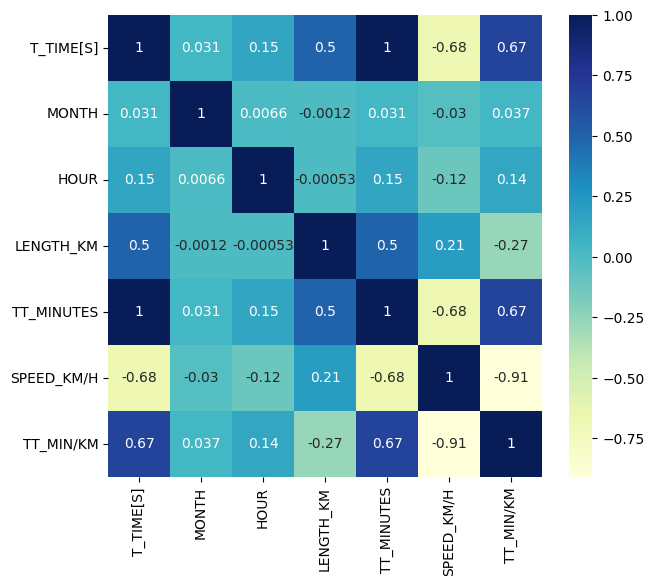

In [16]:
plt.figure(figsize=(7, 6))
ax = plt.subplot()
g = sns.heatmap(df_vel_tv.corr(),annot=True, cmap='YlGnBu')

##### Seasonal decompose for Speed

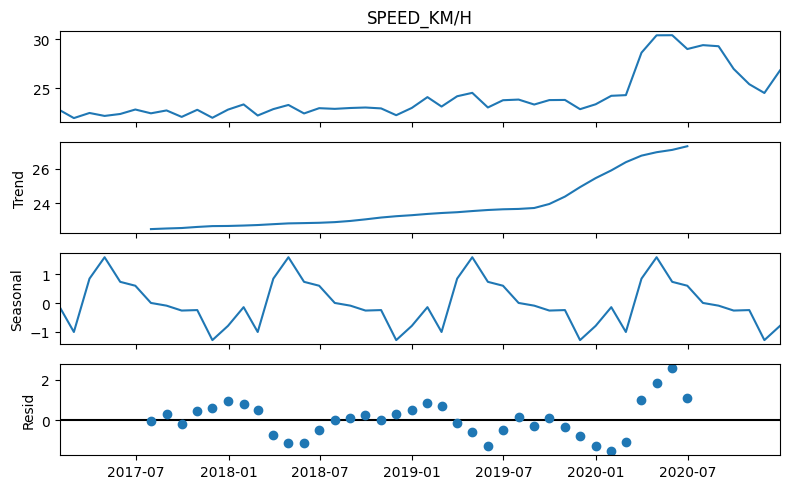

In [17]:
df_month = df_vel_tv.resample("M").mean()
rcParams['figure.figsize'] = 8, 5
decomposition = sm.tsa.seasonal_decompose(df_month['SPEED_KM/H'], model='Additive')
fig = decomposition.plot()
plt.show()

##### Monthly averages for Speed

In [18]:
all_month_year_df = pd.pivot_table(df_vel_tv, values="SPEED_KM/H", index=["MONTH"], columns=["YEAR"], fill_value=0, margins=True)
named_index = [[calendar.month_abbr[i] if isinstance(i, int) else i for i in list(all_month_year_df.index)]]
all_month_year_df = all_month_year_df.set_index(named_index)
all_month_year_df

YEAR,2017,2018,2019,2020,All
Jan,0.000000,23.716330,24.372358,23.934129,24.009840
Feb,21.883850,21.941675,23.313929,22.822714,22.538346
Mar,22.110258,22.833309,24.178462,27.795919,24.450714
Apr,22.239473,23.102817,23.804931,34.306265,25.581972
May,22.108422,22.262116,23.451613,33.338811,24.337645
Jun,22.450248,23.835133,24.065283,30.554611,24.848424
Jul,23.282340,23.441801,23.206473,30.664140,24.576056
Aug,22.587549,22.611103,23.396619,30.675699,24.256279
Sep,22.434014,23.173060,24.016439,26.661167,23.946021
Oct,22.774871,22.767184,23.569157,25.490403,23.502959


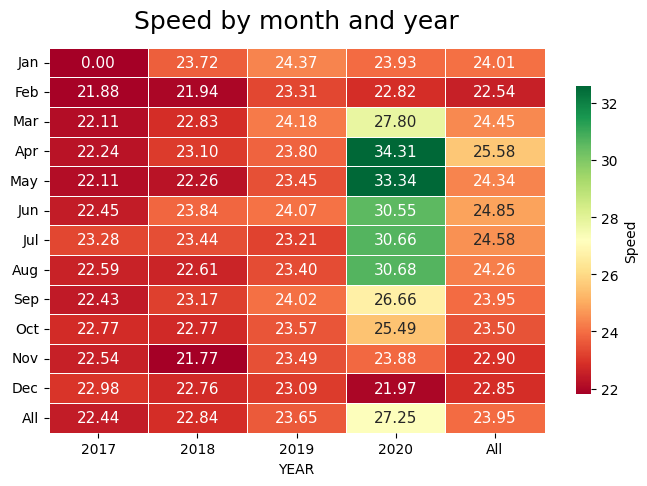

In [19]:
ax = sns.heatmap(all_month_year_df, cmap='RdYlGn', robust=True, fmt='.2f',
                 annot=True, linewidths=.5, annot_kws={'size':11},
                 cbar_kws={'shrink':.8, 'label':'Speed'})

ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)
plt.title('Speed by month and year', fontdict={'fontsize':18},    pad=14);

##### See number of observations by road

In [20]:
df_vel_tv['ROAD_CORRIDOR'].value_counts()

13    32114
14    32085
7     31632
9     31586
15    31379
16    31360
23    31245
24    31217
Name: ROAD_CORRIDOR, dtype: int64

##### See observations by direction

In [21]:
print(df_vel_tv.CORRIDOR_NAME.groupby(df_vel_tv["DIRECTION"]).count())

DIRECTION
NS    126370
SN    126248
Name: CORRIDOR_NAME, dtype: int64


In [22]:
print (df_vel_tv.groupby(["CORRIDOR_NAME", "DIRECTION"])[['CORRIDOR_NAME']].count())

                               CORRIDOR_NAME
CORRIDOR_NAME       DIRECTION               
Avenida 80          NS                 31632
                    SN                 31586
Avenida El Poblado  NS                 32098
                    SN                 32069
Avenida Ferrocarril NS                 31245
                    SN                 31217
Avenida Guayabal    NS                 31395
                    SN                 31376


##### PCA

Take only continuous variables

In [23]:
continuas = df_vel_tv[['T_TIME[S]','LENGTH_KM','TT_MINUTES','SPEED_KM/H','TT_MIN/KM']].copy()
continuas.reset_index(drop = True, inplace = True)
continuas.head()

,T_TIME[S],LENGTH_KM,TT_MINUTES,SPEED_KM/H,TT_MIN/KM
0,693,5.1,11.6,26.0,2.3
1,641,5.1,10.7,29.0,2.1
2,522,3.8,8.7,26.0,2.3
3,453,3.8,7.6,30.0,2.0
4,389,4.1,6.5,38.0,1.6


In [24]:
continuas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252618 entries, 0 to 252617
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   T_TIME[S]   252618 non-null  int64  
 1   LENGTH_KM   252618 non-null  float64
 2   TT_MINUTES  252618 non-null  float64
 3   SPEED_KM/H  252618 non-null  float64
 4   TT_MIN/KM   252618 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 9.6 MB


Extract Principal Components (PC)

In [25]:
pca_pipe = make_pipeline(MinMaxScaler(), PCA())
pca_pipe.fit(continuas)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [26]:
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = continuas.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
)

,T_TIME[S],LENGTH_KM,TT_MINUTES,SPEED_KM/H,TT_MIN/KM
PC1,0.199656,-0.262509,0.199617,-0.848582,0.362338
PC2,0.298505,0.897408,0.298422,-0.125499,0.027360
PC3,0.353624,-0.184255,0.353557,0.511267,0.674243
PC4,0.495842,-0.302983,0.496204,0.052589,-0.642929
PC5,0.707194,-0.000114,-0.707019,0.000020,-0.000208


PC heatmap for 5 components

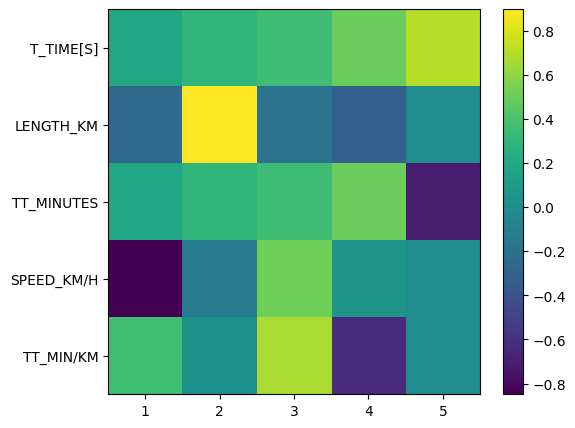

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 5))
componentes = modelo_pca.components_
plt.imshow(componentes.T, aspect='auto')
plt.yticks(range(len(continuas.columns)), continuas.columns)
plt.xticks(range(len(continuas.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

In [28]:
proyecciones = pca_pipe.transform(X=continuas)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'],
    index   = continuas.index
)
proyecciones.head()

,PC1,PC2,PC3,PC4,PC5
0,-0.098051,0.183949,-0.029461,-0.018125,-0.000469
1,-0.163599,0.167214,-0.016081,-0.019041,-0.000101
2,-0.061820,-0.028048,-0.023212,-0.000175,0.000091
3,-0.149771,-0.049937,-0.006429,0.000987,-0.000461
4,-0.325602,-0.039699,0.041099,-0.002416,-0.000095


Variance explained by each component

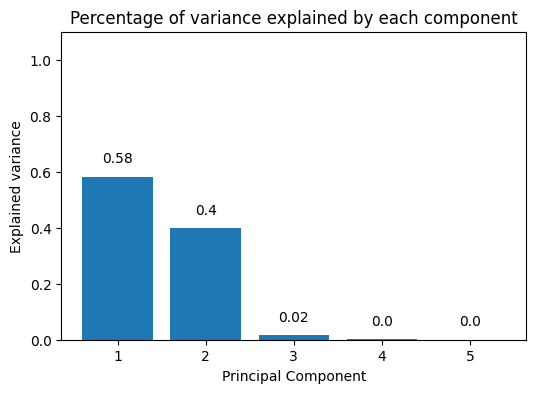

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(continuas.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Percentage of variance explained by each component')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained variance');

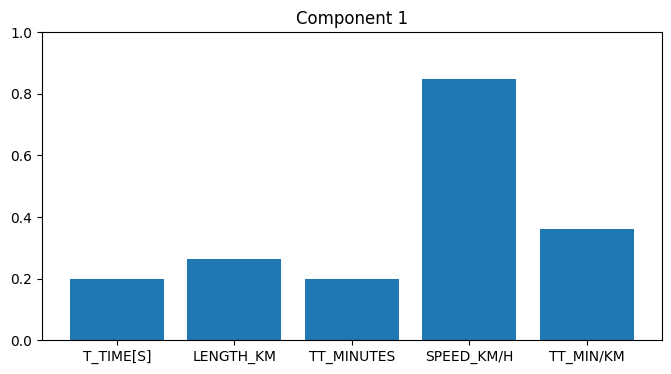

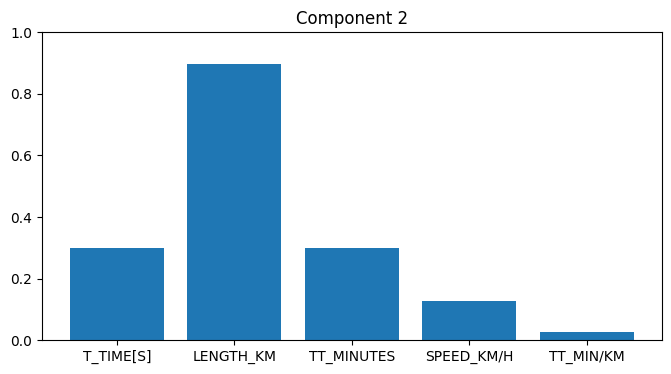

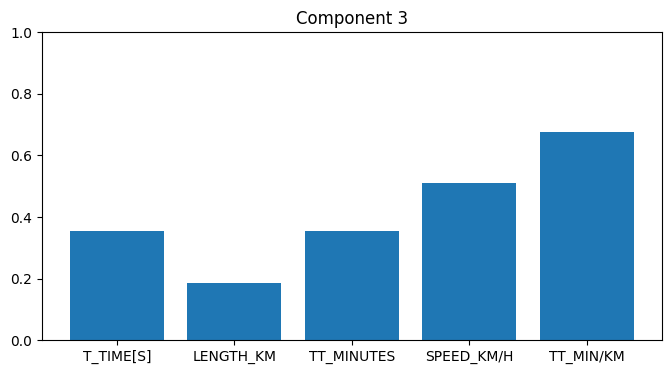

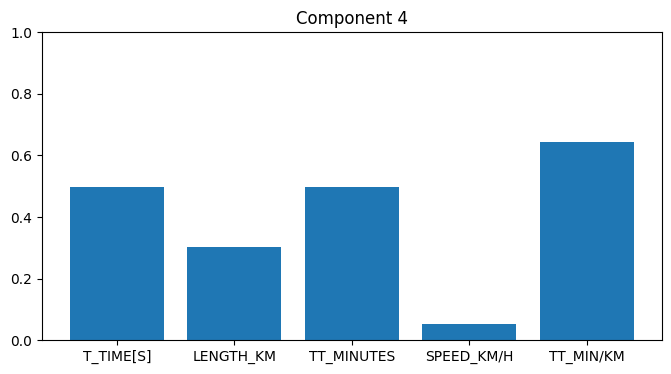

In [30]:
numeros=np.array(continuas.columns)
componentes = np.absolute(componentes)
for i in range(0,4):
    plt.figure(figsize=(8, 4))
    valor = componentes[i,:].reshape(-1)
    plt.bar(numeros, valor)
    plt.title("Component "+str(i+1))
    plt.ylim(0,1)

Cumulative variance

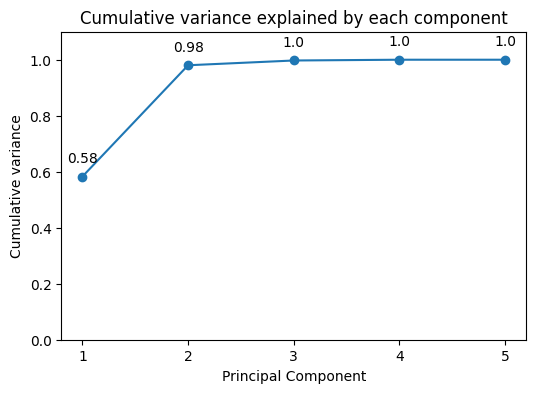

In [31]:
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(continuas.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(continuas.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Cumulative variance explained by each component')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Cumulative variance');

In [32]:
continuas_years = df_vel_tv[['T_TIME[S]','LENGTH_KM','TT_MINUTES','SPEED_KM/H','TT_MIN/KM','DAY_NAME','YEAR']].copy()
continuas_years

,T_TIME[S],LENGTH_KM,TT_MINUTES,SPEED_KM/H,TT_MIN/KM,DAY_NAME,YEAR
FECHA_HORA,,,,,,,
2017-01-02 06:00:00,693,5.1,11.6,26.0,2.3,Wednesday,2017
2017-01-02 06:00:00,641,5.1,10.7,29.0,2.1,Wednesday,2017
2017-01-02 06:00:00,522,3.8,8.7,26.0,2.3,Wednesday,2017
2017-01-02 06:00:00,453,3.8,7.6,30.0,2.0,Wednesday,2017
2017-01-02 06:00:00,389,4.1,6.5,38.0,1.6,Wednesday,2017
...,...,...,...,...,...,...,...
2020-12-15 20:00:00,443,3.8,7.4,30.9,1.9,Tuesday,2020
2020-12-15 20:00:00,709,4.1,11.8,20.8,2.9,Tuesday,2020
2020-12-15 20:00:00,423,4.1,7.1,34.9,1.7,Tuesday,2020


In [33]:
diario = continuas_years.groupby(continuas_years["DAY_NAME"]).mean()

In [34]:
diario.sort_values(['T_TIME[S]','SPEED_KM/H'],ascending=False)
diario

,T_TIME[S],LENGTH_KM,TT_MINUTES,SPEED_KM/H,TT_MIN/KM
DAY_NAME,,,,,
Friday,702.532851,3.830905,11.717341,21.617743,3.147640
Monday,612.508953,3.828930,10.216736,24.311554,2.745194
Saturday,603.054866,3.827479,10.059342,25.281018,2.672257
Sunday,475.473120,3.827903,7.932934,30.340100,2.084605
Thursday,675.886125,3.830718,11.273192,22.237553,3.033740
Tuesday,668.008149,3.827617,11.141782,22.406765,3.001773
Wednesday,670.011124,3.829529,11.175161,22.462353,3.008953


##### Variable distribution

Distplots

Box and whiskers plots

<Axes: xlabel='TT_MIN/KM', ylabel='Density'>

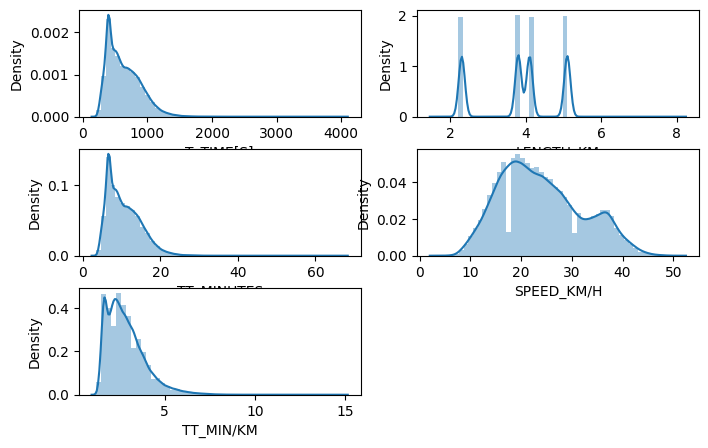

In [35]:
(ax_dist) = plt.subplot(3,2,1)
(ax_dist2) = plt.subplot(3,2,2)
(ax_dist3) = plt.subplot(3,2,3)
(ax_dist4) = plt.subplot(3,2,4)
(ax_dist5) = plt.subplot(3,2,5)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)

sns.distplot(continuas["T_TIME[S]"], ax=ax_dist)
sns.distplot(continuas["LENGTH_KM"], ax=ax_dist2)
sns.distplot(continuas["TT_MINUTES"], ax=ax_dist3)
sns.distplot(continuas["SPEED_KM/H"], ax=ax_dist4)
sns.distplot(continuas["TT_MIN/KM"], ax=ax_dist5)

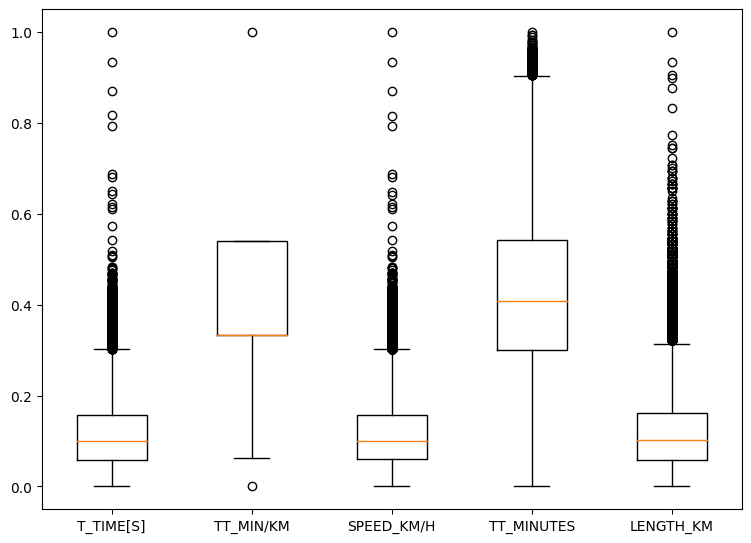

In [36]:
data3 = continuas["SPEED_KM/H"]
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(continuas)
fig = plt.figure(figsize =(7, 5))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticklabels(['T_TIME[S]', 'TT_MIN/KM',
                    'SPEED_KM/H', 'TT_MINUTES', 'LENGTH_KM'])
bp = ax.boxplot(scaled)
plt.show()